# Real Time AQ Data

Realtime RAMP AQ data from the WFRT rooftop is read in with the code below. Plots for the 7 constituents it reads in can be seen below. 

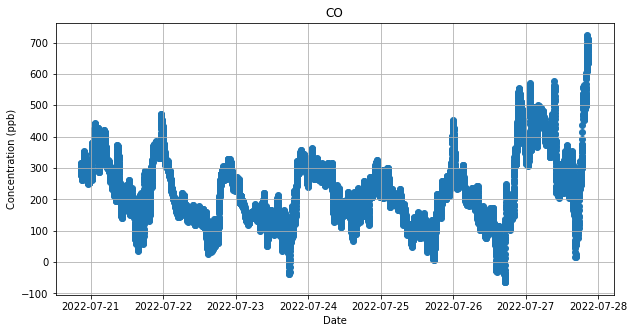

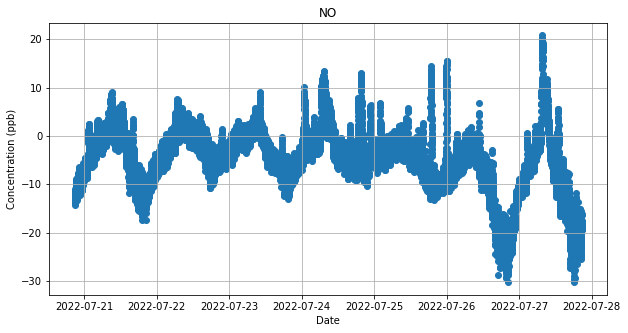

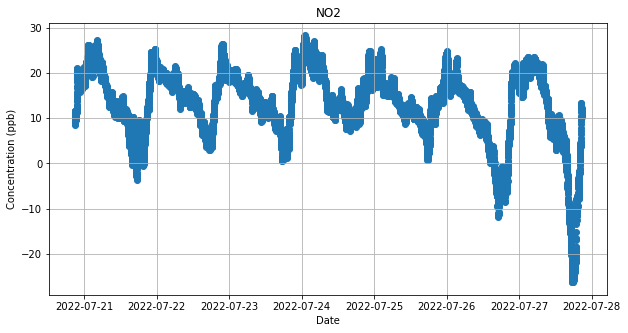

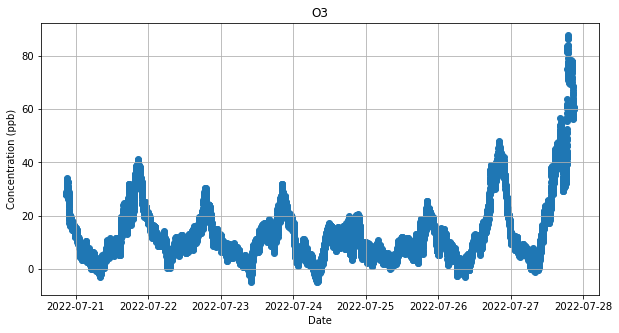

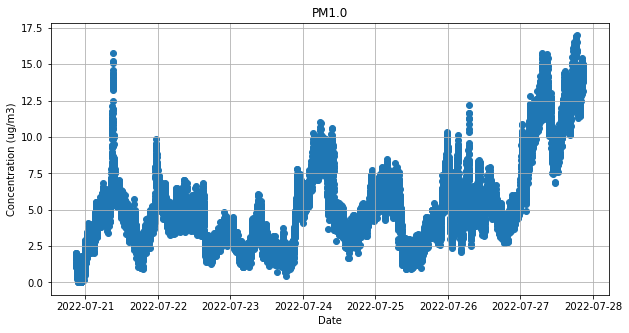

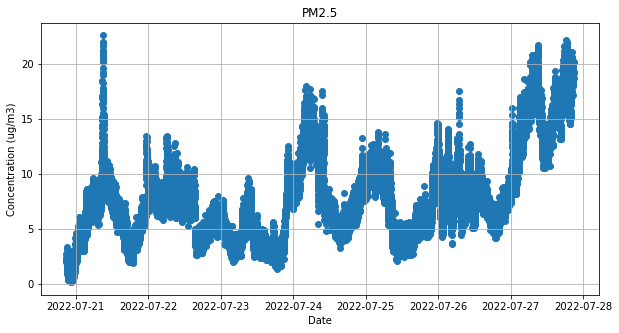

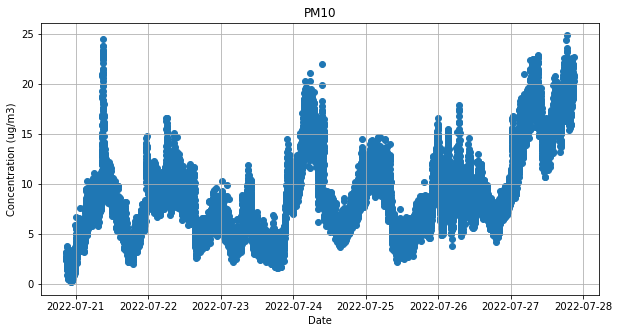

In [1]:
from func import run

run()